In [173]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
import matplotlib.pyplot as plt

In [29]:
%matplotlib inline

In [81]:
cereals = pd.read_csv('cereals.csv')

In [120]:
cereals.tail()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
72,Triples,G,C,110,2,1,250,0,21,3,60,25,3,1,0.75
73,Trix,G,C,110,1,1,140,0,13,12,25,25,2,1,1.00
74,Wheat_Chex,R,C,100,3,1,230,3,17,3,115,25,1,1,0.67
75,Wheaties,G,C,100,3,1,200,3,17,3,110,25,1,1,1.00
76,Wheaties_Honey_Gold,G,C,110,2,1,200,1,16,8,60,25,1,1,0.75


In [168]:
test_cereals = np.array([[170, 11, 1.5, 85, 9, 36, 8, 270, 26, 1],
                         [103, 1.5, .6, 38, 1.4, 24, 15, 49, 20, .75]])

In [169]:
test_df = pd.DataFrame(test_cereals, columns=['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins', 'cups'])

##Processing Data

In [82]:
cereals.replace('-1', cereals.mean(), inplace=True)

In [83]:
num_columns = cereals[['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups']]
norm_df = num_columns.apply(lambda row: row * (1/row['cups']), axis=1)

In [170]:
norm_test = test_df.apply(lambda row: row * 1/row['cups'], axis=1)
scaled_test = preprocessing.scale(norm_test)
test = pd.DataFrame(scaled_test, columns=['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins', 'cups'])

In [84]:
nums_scaled = preprocessing.scale(norm_df)
scaled_df = pd.DataFrame(nums_scaled, columns=['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups'])

In [85]:
scaled_df.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
0,1.147341,3.423808,0.970720,1.323849,4.729379,-0.527990,1.516802,4.197513,1.459918,2.762739,2.675558,0
1,-0.392323,-0.248748,2.175351,-1.452691,-0.282811,-1.423470,-0.232761,-0.101023,-1.394093,-0.070810,-0.666052,0
2,1.147341,3.423808,0.970720,4.210295,4.192742,0.230891,0.996099,4.927781,1.459918,2.762739,2.675558,0
3,-0.726592,1.764447,-0.882558,0.488999,4.321535,-0.421747,-1.607417,3.061948,0.489555,1.324819,0.979816,0
4,0.053369,-0.382961,0.748327,0.391304,-0.400871,-0.087839,0.225458,-0.142570,-0.138328,0.394400,-0.117430,0


In [86]:
other_cols = cereals[['name', 'mfr', 'type']]

In [87]:
new_df = pd.merge(other_cols, scaled_df, left_index=True, right_index=True)

In [122]:
new_df.tail(20)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
57,Quaker_Oatmeal,Q,H,0.096608,1.548104,0.943059,-1.562598,0.076656,0.302896,0.167859,0.074773,-1.394093,-0.772096,0.144599,0
58,Raisin_Bran,K,C,0.276215,0.153891,-0.067116,0.488999,0.543610,-0.087839,1.141896,1.013548,-0.138328,-0.225880,0.606752,0
59,Raisin_Nut_Bran,G,C,0.944754,0.959169,1.563769,0.488999,0.248460,0.204330,1.141896,0.772559,0.489555,1.324819,0.979816,0
60,Raisin_Squares,K,C,0.610485,0.153891,-0.882558,-1.562598,0.071370,1.331269,0.454568,0.411077,0.489555,1.324819,0.979816,0
61,Rice_Chex,R,C,-0.770964,-1.100347,-0.882558,-0.006392,-0.636991,0.123439,-1.303290,-0.754410,-0.560621,-1.054748,-0.855400,0
62,Rice_Krispies,K,C,-0.559457,-0.651387,-0.882558,0.562271,-0.636991,0.329546,-1.091921,-0.703494,-0.452269,-1.001229,-0.666052,0
63,Shredded_Wheat,N,C,-1.060861,-0.651387,-0.882558,-1.562598,-0.105721,-0.421747,-1.607417,-0.342011,-1.394093,-1.001229,-0.945850,0
64,Shredded_Wheat_'n'Bran,N,C,-0.152846,0.346196,-0.882558,-1.562598,0.420264,1.125692,-1.607417,0.344536,-1.394093,-0.772096,0.144599,0
65,Shredded_Wheat_spoon_size,N,C,-0.152846,0.346196,-0.882558,-1.562598,0.155950,1.312580,-1.607417,0.164694,-1.394093,-0.772096,0.144599,0
66,Smacks,K,C,0.053369,-0.382961,-0.067116,-0.878732,-0.400871,-0.922609,1.829224,-0.593041,-0.138328,-0.225880,-0.117430,0


###Strongest Correlation

In [90]:
new_df.corr()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
calories,1.000000,0.695173,0.571156,0.557644,0.397544,0.779935,0.550719,0.489555,0.460674,0.798645,0.917061,NaN
protein,0.695173,1.000000,0.408003,0.499966,0.792964,0.543850,0.216226,0.830069,0.377264,0.783356,0.839599,NaN
fat,0.571156,0.408003,1.000000,0.207203,0.209571,0.140466,0.436592,0.319417,0.180092,0.450872,0.456609,NaN
sodium,0.557644,0.499966,0.207203,1.000000,0.473645,0.446843,0.313413,0.526907,0.491255,0.543823,0.628566,NaN
fiber,0.397544,0.792964,0.209571,0.473645,1.000000,0.217233,0.175416,0.961150,0.317400,0.670541,0.690713,NaN
carbo,0.779935,0.543850,0.140466,0.446843,0.217233,1.000000,0.018465,0.253442,0.370145,0.595333,0.705771,NaN
sugars,0.550719,0.216226,0.436592,0.313413,0.175416,0.018465,1.000000,0.297057,0.249821,0.382400,0.512461,NaN
potass,0.489555,0.830069,0.319417,0.526907,0.961150,0.253442,0.297057,1.000000,0.338606,0.727946,0.759611,NaN
vitamins,0.460674,0.377264,0.180092,0.491255,0.317400,0.370145,0.249821,0.338606,1.000000,0.537410,0.488464,NaN
shelf,0.798645,0.783356,0.450872,0.543823,0.670541,0.595333,0.382400,0.727946,0.537410,1.000000,0.874568,NaN


In [91]:
pot_and_fib = new_df[['potass', 'fiber']]

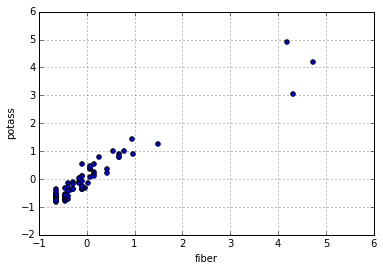

In [92]:
pot_and_fib.plot(kind='scatter', x='fiber', y='potass')

##Clustering

In [94]:
num_data = new_df[['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins', 'shelf']]

In [136]:
kmeans = KMeans(3)
kmeans.fit(num_data)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [137]:
clusters = kmeans.predict(num_data)
clusters

array([1, 2, 1, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2,
       0, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 2], dtype=int32)

In [154]:
cereals = new_df['name']

In [155]:
cluster = kmeans.labels_

In [156]:
results = pd.DataFrame(dict(cereals = cereals, cluster = cluster))

In [163]:
results

,cereals,cluster
0,100%_Bran,1
1,100%_Natural_Bran,2
2,All-Bran,1
3,All-Bran_with_Extra_Fiber,0
4,Almond_Delight,2
5,Apple_Cinnamon_Cheerios,2
6,Apple_Jacks,2
7,Basic_4,0
8,Bran_Chex,2
9,Bran_Flakes,0


Looking at the first few results, these choices make sense because, on the whole, 100% natural bran appears to have less nutritional content than those surrounding it (especially when looking at the vitamin content).

Looking at the last 4, the normalized dataframe has very similar data for the ones which have been classified together. Generally, the ones that are positive are clustered together, as are the negatives.

It seems like cereals with higher carbs and sodium are being clustered together. Cluster 2 seems to be the more sugary cereals. Cluster 0 looks like really dense, fibrous cereals. Cluster 1 seems to contain the few outliers (grape nuts and such).

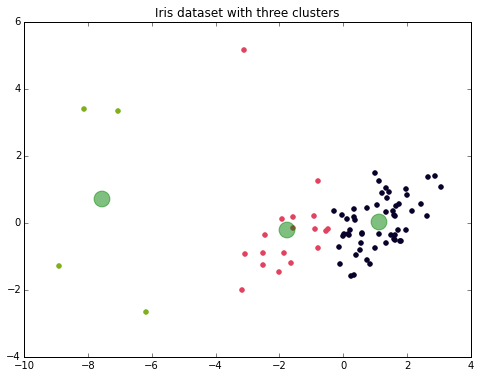

In [139]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(num_data)
pca_2d = pca.transform(num_data)

cluster_2d = pca.transform(kmeans.cluster_centers_)
colors = ["#E2415F", "#7FAF1B", "#090129", "#843023", "#037892"]
markers = ["v", "D", "s"]

plt.figure(figsize=(8, 6))

for i in range(pca_2d.shape[0]):
    c = clusters[i]
    color = colors[c]
    plt.scatter(pca_2d[i,0], pca_2d[i, 1], color=color)
    
for i in range(cluster_2d.shape[0]):
    plt.scatter(cluster_2d[i, 0], cluster_2d[i, 1], color='g', alpha='0.5', s=250, marker='o')

plt.title("Iris dataset with three clusters")
plt.show()

Testing 2 cereals, one really fibrous, protein-filled healthy cereal and one super sugary cereal.

In [171]:
cluster = kmeans.predict(test)

In [172]:
cluster

array([0, 2], dtype=int32)

The healthy cereal got 0 for the dense healthy cereals and the sugary one got 2 for the less healthy, less substantial cereals.

##MeanShift

In [209]:
ms = MeanShift(2.1)
ms.fit(num_data)

MeanShift(bandwidth=2.1, bin_seeding=False, cluster_all=True, min_bin_freq=1,
     seeds=None)

In [210]:
ms.predict(num_data)

array([ 8,  9,  5, 10,  0,  0,  0,  1,  0,  0,  0,  0,  0,  1,  0,  0,  0,
        0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  6,
        4,  0,  0,  0,  2,  3,  0,  0,  0,  0,  0,  0,  1,  0,  0,  1,  0,
        1,  1,  2,  0,  0,  1,  9,  1,  1,  7,  0,  0,  0,  0,  0,  0,  0,
        0,  2,  2,  2,  0,  0,  0,  0,  0])

In [211]:
ms.predict(test)

array([1, 0])

2.1 is the lowest bandwidth size at which the meanshift predictor distinguishes between the really sugary cereal and the fibrous, hearty cereal.